In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error,mean_absolute_error

/home/fahad/anaconda3/envs/ml-proj/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
df = pd.read_csv('../students_data_by_date.csv')
df.columns = df.columns.str.strip().str.replace(' ','_').str.replace(',','').str.lower()  # Remove any leading/trailing whitespace from column names

# Data Inspection

In [3]:
df.head()

,date,uid,app_usage_total_app_switch,app_usage_total_num_tasks,app_usage_most_used_app,call_log_total_calls,dinning_skipped_meal,dinning_total_meals,ema_exercise_exercise,ema_exercise_have,...,survey_loneliness_score,survey_survey_stress_score,survey_feeling_down_depressed_hopeless,survey_feeling_tired_or_having_little_energy,survey_bed_time,survey_wake_up_time,survey_sleep_time,survey_sleep_within_30min,survey_taken_sleeping_medicine,survey_sleep_quality
0,2013-03-24,u51,97.0,97.0,org.bewellapp,19.0,NaN,NaN,NaN,NaN,...,7.0,8.0,0.0,0.0,2.0,9.0,6.5,0.0,0.0,2.0
1,2013-03-25,u51,136.0,136.0,com.google.android.gm,24.0,NaN,NaN,NaN,NaN,...,7.0,8.0,0.0,0.0,2.0,9.0,6.5,0.0,0.0,2.0
2,2013-03-26,u51,115.0,115.0,com.google.android.gm,24.0,NaN,NaN,NaN,NaN,...,7.0,8.0,0.0,0.0,2.0,9.0,6.5,0.0,0.0,2.0
3,2013-03-27,u51,82.0,82.0,org.bewellapp,68.0,NaN,NaN,NaN,NaN,...,7.0,8.0,0.0,0.0,2.0,9.0,6.5,0.0,0.0,2.0
4,2013-03-28,u51,112.0,65.0,com.android.chrome,22.0,NaN,NaN,1.0,2.0,...,7.0,8.0,0.0,0.0,2.0,9.0,6.5,0.0,0.0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4694 entries, 0 to 4693
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   date                                            4694 non-null   object 
 1   uid                                             4694 non-null   object 
 2   app_usage_total_app_switch                      2406 non-null   float64
 3   app_usage_total_num_tasks                       2406 non-null   float64
 4   app_usage_most_used_app                         2406 non-null   object 
 5   call_log_total_calls                            3074 non-null   float64
 6   dinning_skipped_meal                            3040 non-null   float64
 7   dinning_total_meals                             3040 non-null   float64
 8   ema_exercise_exercise                           1826 non-null   float64
 9   ema_exercise_have                        

In [5]:
df.dtypes

date                                               object
uid                                                object
app_usage_total_app_switch                        float64
app_usage_total_num_tasks                         float64
app_usage_most_used_app                            object
call_log_total_calls                              float64
dinning_skipped_meal                              float64
dinning_total_meals                               float64
ema_exercise_exercise                             float64
ema_exercise_have                                 float64
ema_exercise_walk                                 float64
ema_sleep_hour                                    float64
ema_sleep_rate                                    float64
ema_sleep_social                                  float64
ema_social_people_you_contacted_yesterday         float64
ema_stress_level                                  float64
sensing_total_duration_of_motion_sensing          float64
sensing_total_

In [6]:
df.describe(include='O')

,date,uid,app_usage_most_used_app
count,4694,4694,2406
unique,183,49,17
top,2013-04-11,u59,com.android.chrome
freq,49,148,550


# Data Cleaning

In [7]:
# Checking for missing values
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

ema_social_people_you_contacted_yesterday         79.037069
ema_sleep_hour                                    74.350234
ema_sleep_social                                  74.350234
ema_sleep_rate                                    74.350234
ema_stress_level                                  73.498083
ema_exercise_have                                 61.291010
ema_exercise_walk                                 61.099276
ema_exercise_exercise                             61.099276
app_usage_most_used_app                           48.743076
app_usage_total_app_switch                        48.743076
app_usage_total_num_tasks                         48.743076
sensing_total_daily_conversation                  41.798040
sensing_total_duration_of_motion_sensing          40.754154
dinning_total_meals                               35.236472
dinning_skipped_meal                              35.236472
call_log_total_calls                              34.512143
survey_loneliness_score                 

In [8]:
# Filtering rows where our target variable is not NaN

stress_df = df[~df.ema_stress_level.isna()]
stress_df.shape

(1244, 41)

In [9]:
# Checking for missing values in stress_df
(stress_df.isna().sum()/stress_df.shape[0]*100).sort_values(ascending=False)

ema_social_people_you_contacted_yesterday         46.302251
dinning_skipped_meal                              43.890675
dinning_total_meals                               43.890675
ema_sleep_rate                                    31.913183
ema_sleep_social                                  31.913183
ema_sleep_hour                                    31.913183
survey_bed_time                                   19.855305
survey_wake_up_time                               19.855305
survey_sleep_time                                 19.855305
survey_i_lead_a_purposeful_and_meaningful_life    19.212219
survey_i_am_optimistic_about_my_future            19.212219
survey_people_respect_me                          19.212219
survey_i_am_a_good_person_and_live_a_good_life    19.212219
survey_sleep_quality                              18.167203
survey_taken_sleeping_medicine                    18.167203
survey_sleep_within_30min                         18.167203
survey_gets_nervous_easily              

In [10]:
# Aggregating data at student level
stud_gruped_df = df.groupby('uid').agg(
    ema_social_people_you_contacted_yesterday = ('ema_social_people_you_contacted_yesterday', 'mean'),
    dinning_skipped_meal = ('dinning_skipped_meal', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    dinning_total_meals = ('dinning_total_meals', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    app_usage_most_used_app = ('app_usage_most_used_app', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    survey_gets_nervous_easily = ('survey_gets_nervous_easily', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ema_sleep_rate = ('ema_sleep_rate', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ema_sleep_social = ('ema_sleep_social', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ema_sleep_hour = ('ema_sleep_hour', 'mean'),
    app_usage_total_num_tasks = ('app_usage_total_num_tasks', 'mean'),
    app_usage_total_app_switch = ('app_usage_total_app_switch', 'mean'),
    sensing_total_daily_conversation = ('sensing_total_daily_conversation', 'mean'),
    sensing_total_duration_of_motion_sensing = ('sensing_total_duration_of_motion_sensing', 'mean')
)
stud_gruped_df

,ema_social_people_you_contacted_yesterday,dinning_skipped_meal,dinning_total_meals,app_usage_most_used_app,survey_gets_nervous_easily,ema_sleep_rate,ema_sleep_social,ema_sleep_hour,app_usage_total_num_tasks,app_usage_total_app_switch,sensing_total_daily_conversation,sensing_total_duration_of_motion_sensing
uid,,,,,,,,,,,,
u00,2.972973,NaN,NaN,com.google.android.gm,1.0,1.0,1.0,7.511628,220.646341,245.500000,24312.060606,8330.390625
u01,3.533333,1.0,2.0,org.bewellapp,2.0,2.0,1.0,7.416667,146.043478,135.282609,30269.327273,6618.129032
u02,2.800000,1.0,2.0,com.google.android.gm,4.0,2.0,1.0,7.956522,158.289855,189.492754,19386.907692,5328.835821
u03,1.625000,NaN,NaN,com.android.chrome,4.0,1.0,1.0,8.285714,124.640000,127.600000,5778.976744,1478.923077
u04,3.100000,1.0,5.0,com.google.android.gallery3d,5.0,2.0,1.0,6.615385,132.236842,210.763158,25965.275862,9534.206897
u05,4.500000,1.0,3.0,com.android.chrome,3.0,1.0,1.0,8.250000,66.435897,70.897436,16978.375000,3374.049180
u07,3.352941,1.0,2.0,com.android.chrome,2.0,2.0,1.0,7.100000,260.978261,215.586957,17970.333333,5152.869565
u08,2.906250,1.0,2.0,com.android.contacts,NaN,1.0,1.0,7.515152,388.358209,419.134328,23545.984375,6077.562500
u09,3.000000,1.0,2.0,com.google.android.gm,2.0,2.0,1.0,8.000000,118.081967,108.213115,25978.575758,7122.409091


In [11]:
(stud_gruped_df.isna().sum()/stud_gruped_df.shape[0]*100).sort_values(ascending=False)

dinning_skipped_meal                         36.734694
dinning_total_meals                          36.734694
survey_gets_nervous_easily                   22.448980
ema_social_people_you_contacted_yesterday     2.040816
app_usage_most_used_app                       0.000000
ema_sleep_rate                                0.000000
ema_sleep_social                              0.000000
ema_sleep_hour                                0.000000
app_usage_total_num_tasks                     0.000000
app_usage_total_app_switch                    0.000000
sensing_total_daily_conversation              0.000000
sensing_total_duration_of_motion_sensing      0.000000
dtype: float64

In [12]:
# People tends to follow their average behavior, so filling missing values with mean/mode of each student.s

stress_df = stress_df.drop(columns = ['dinning_skipped_meal','dinning_total_meals'])

cols_to_fill_average = ['ema_social_people_you_contacted_yesterday', 'ema_sleep_rate', 'ema_sleep_hour',
                        'ema_sleep_social','app_usage_total_num_tasks','app_usage_most_used_app',
                        'app_usage_total_app_switch','survey_gets_nervous_easily','sensing_total_daily_conversation',
                        'sensing_total_duration_of_motion_sensing']
for stud in stress_df['uid'].unique():
    for col in cols_to_fill_average:    
        stud_mean = stud_gruped_df.loc[stud, col]
        stress_df.loc[(stress_df['uid'] == stud) & (stress_df[col].isna()), col] = stud_mean

In [13]:
def get_stress_df_na_percent():
    return (stress_df.isna().sum()/stress_df.shape[0]*100).sort_values(ascending=False)

get_stress_df_na_percent()

survey_bed_time                                   19.855305
survey_wake_up_time                               19.855305
survey_sleep_time                                 19.855305
survey_i_am_a_good_person_and_live_a_good_life    19.212219
survey_people_respect_me                          19.212219
survey_i_am_optimistic_about_my_future            19.212219
survey_i_lead_a_purposeful_and_meaningful_life    19.212219
survey_sleep_quality                              18.167203
survey_taken_sleeping_medicine                    18.167203
survey_sleep_within_30min                         18.167203
survey_gets_nervous_easily                        17.282958
survey_loneliness_score                           16.961415
survey_survey_stress_score                        16.881029
survey_feeling_tired_or_having_little_energy      16.639871
survey_feeling_down_depressed_hopeless            16.639871
survey_worries_a_lot                              15.353698
survey_is_talkative                     

In [14]:
# Checking the distribution of missing values given sleep_queality is missing
missing_survey_entries = stress_df[stress_df['survey_sleep_quality'].isna()]
((missing_survey_entries.isna().sum())/missing_survey_entries.shape[0]*100).sort_values(ascending=False)

survey_sleep_quality                              100.000000
survey_people_respect_me                          100.000000
survey_i_am_optimistic_about_my_future            100.000000
survey_sleep_time                                 100.000000
survey_sleep_within_30min                         100.000000
survey_bed_time                                   100.000000
survey_wake_up_time                               100.000000
survey_i_lead_a_purposeful_and_meaningful_life    100.000000
survey_i_am_a_good_person_and_live_a_good_life    100.000000
survey_taken_sleeping_medicine                    100.000000
survey_survey_stress_score                         92.920354
survey_feeling_tired_or_having_little_energy       82.300885
survey_feeling_down_depressed_hopeless             82.300885
survey_loneliness_score                            82.300885
survey_gets_nervous_easily                         75.221239
survey_worries_a_lot                               75.221239
survey_is_talkative     

In [15]:
# checking if it is only missing from a couple of users
missing_survey_entries.uid.value_counts(normalize=True).sort_values(ascending=False)

uid
u57    0.199115
u58    0.176991
u08    0.172566
u22    0.137168
u12    0.097345
u54    0.070796
u25    0.061947
u41    0.044248
u39    0.026549
u50    0.013274
Name: proportion, dtype: float64

In [16]:
# now its safe to remove these entries
stress_df = stress_df[~stress_df['survey_sleep_quality'].isna()]
get_stress_df_na_percent()

survey_gets_nervous_easily                        4.420432
call_log_total_calls                              2.652259
survey_loneliness_score                           2.455796
survey_tends_to_be_quiet                          2.062868
survey_is_helpful_and_unselfish_with_others       2.062868
survey_is_depressed_blue                          2.062868
survey_tends_to_find_fault_with_others            2.062868
survey_feeling_down_depressed_hopeless            2.062868
survey_feeling_tired_or_having_little_energy      2.062868
survey_bed_time                                   2.062868
survey_wake_up_time                               2.062868
survey_sleep_time                                 2.062868
survey_is_easily_distracted                       2.062868
survey_is_relaxed_handles_stress_well.            2.062868
survey_worries_a_lot                              2.062868
survey_is_talkative                               2.062868
survey_people_respect_me                          1.2770

In [17]:
stress_df = stress_df[~stress_df['survey_is_depressed_blue'].isna()]
get_stress_df_na_percent()

call_log_total_calls                              2.708124
survey_gets_nervous_easily                        2.407222
survey_i_am_optimistic_about_my_future            1.303912
survey_i_am_a_good_person_and_live_a_good_life    1.303912
survey_i_lead_a_purposeful_and_meaningful_life    1.303912
survey_people_respect_me                          1.303912
survey_loneliness_score                           0.401204
ema_exercise_have                                 0.300903
app_usage_most_used_app                           0.000000
ema_exercise_exercise                             0.000000
app_usage_total_app_switch                        0.000000
date                                              0.000000
uid                                               0.000000
app_usage_total_num_tasks                         0.000000
ema_exercise_walk                                 0.000000
sensing_total_daily_conversation                  0.000000
survey_is_talkative                               0.0000

In [18]:
# Total rows with na values
stress_df.shape[0] - stress_df.dropna().shape[0]

68

In [19]:
stress_df = stress_df.dropna()
stress_df.shape

(929, 39)

In [20]:
# Making none values as 0 instead of 1 in the data
stress_df['ema_exercise_exercise'] = stress_df['ema_exercise_exercise'] - 1
stress_df['ema_exercise_have'] = np.absolute(stress_df['ema_exercise_have'] - 2)
stress_df['ema_exercise_walk'] = stress_df['ema_exercise_walk'] - 1

# Univariate Analysis

In [21]:
df = stress_df

In [22]:
df.columns

Index(['date', 'uid', 'app_usage_total_app_switch',
       'app_usage_total_num_tasks', 'app_usage_most_used_app',
       'call_log_total_calls', 'ema_exercise_exercise', 'ema_exercise_have',
       'ema_exercise_walk', 'ema_sleep_hour', 'ema_sleep_rate',
       'ema_sleep_social', 'ema_social_people_you_contacted_yesterday',
       'ema_stress_level', 'sensing_total_duration_of_motion_sensing',
       'sensing_total_daily_conversation', 'survey_is_talkative',
       'survey_tends_to_find_fault_with_others', 'survey_is_depressed_blue',
       'survey_is_helpful_and_unselfish_with_others',
       'survey_is_relaxed_handles_stress_well.', 'survey_worries_a_lot',
       'survey_tends_to_be_quiet', 'survey_gets_nervous_easily',
       'survey_is_easily_distracted',
       'survey_i_lead_a_purposeful_and_meaningful_life',
       'survey_i_am_a_good_person_and_live_a_good_life',
       'survey_i_am_optimistic_about_my_future', 'survey_people_respect_me',
       'survey_loneliness_score', 'su

In [23]:
cols_to_explore = [
    'app_usage_total_app_switch',
    # 'app_usage_total_num_tasks', 
    # 'app_usage_most_used_app',
    'call_log_total_calls', 
    'ema_exercise_exercise', 
    'ema_exercise_have',
    # 'ema_exercise_walk', 
    'ema_sleep_hour', 
    'ema_sleep_rate',
    'ema_sleep_social', 
    'ema_social_people_you_contacted_yesterday',
    'ema_stress_level',
    'sensing_total_duration_of_motion_sensing',
    'sensing_total_daily_conversation',
]

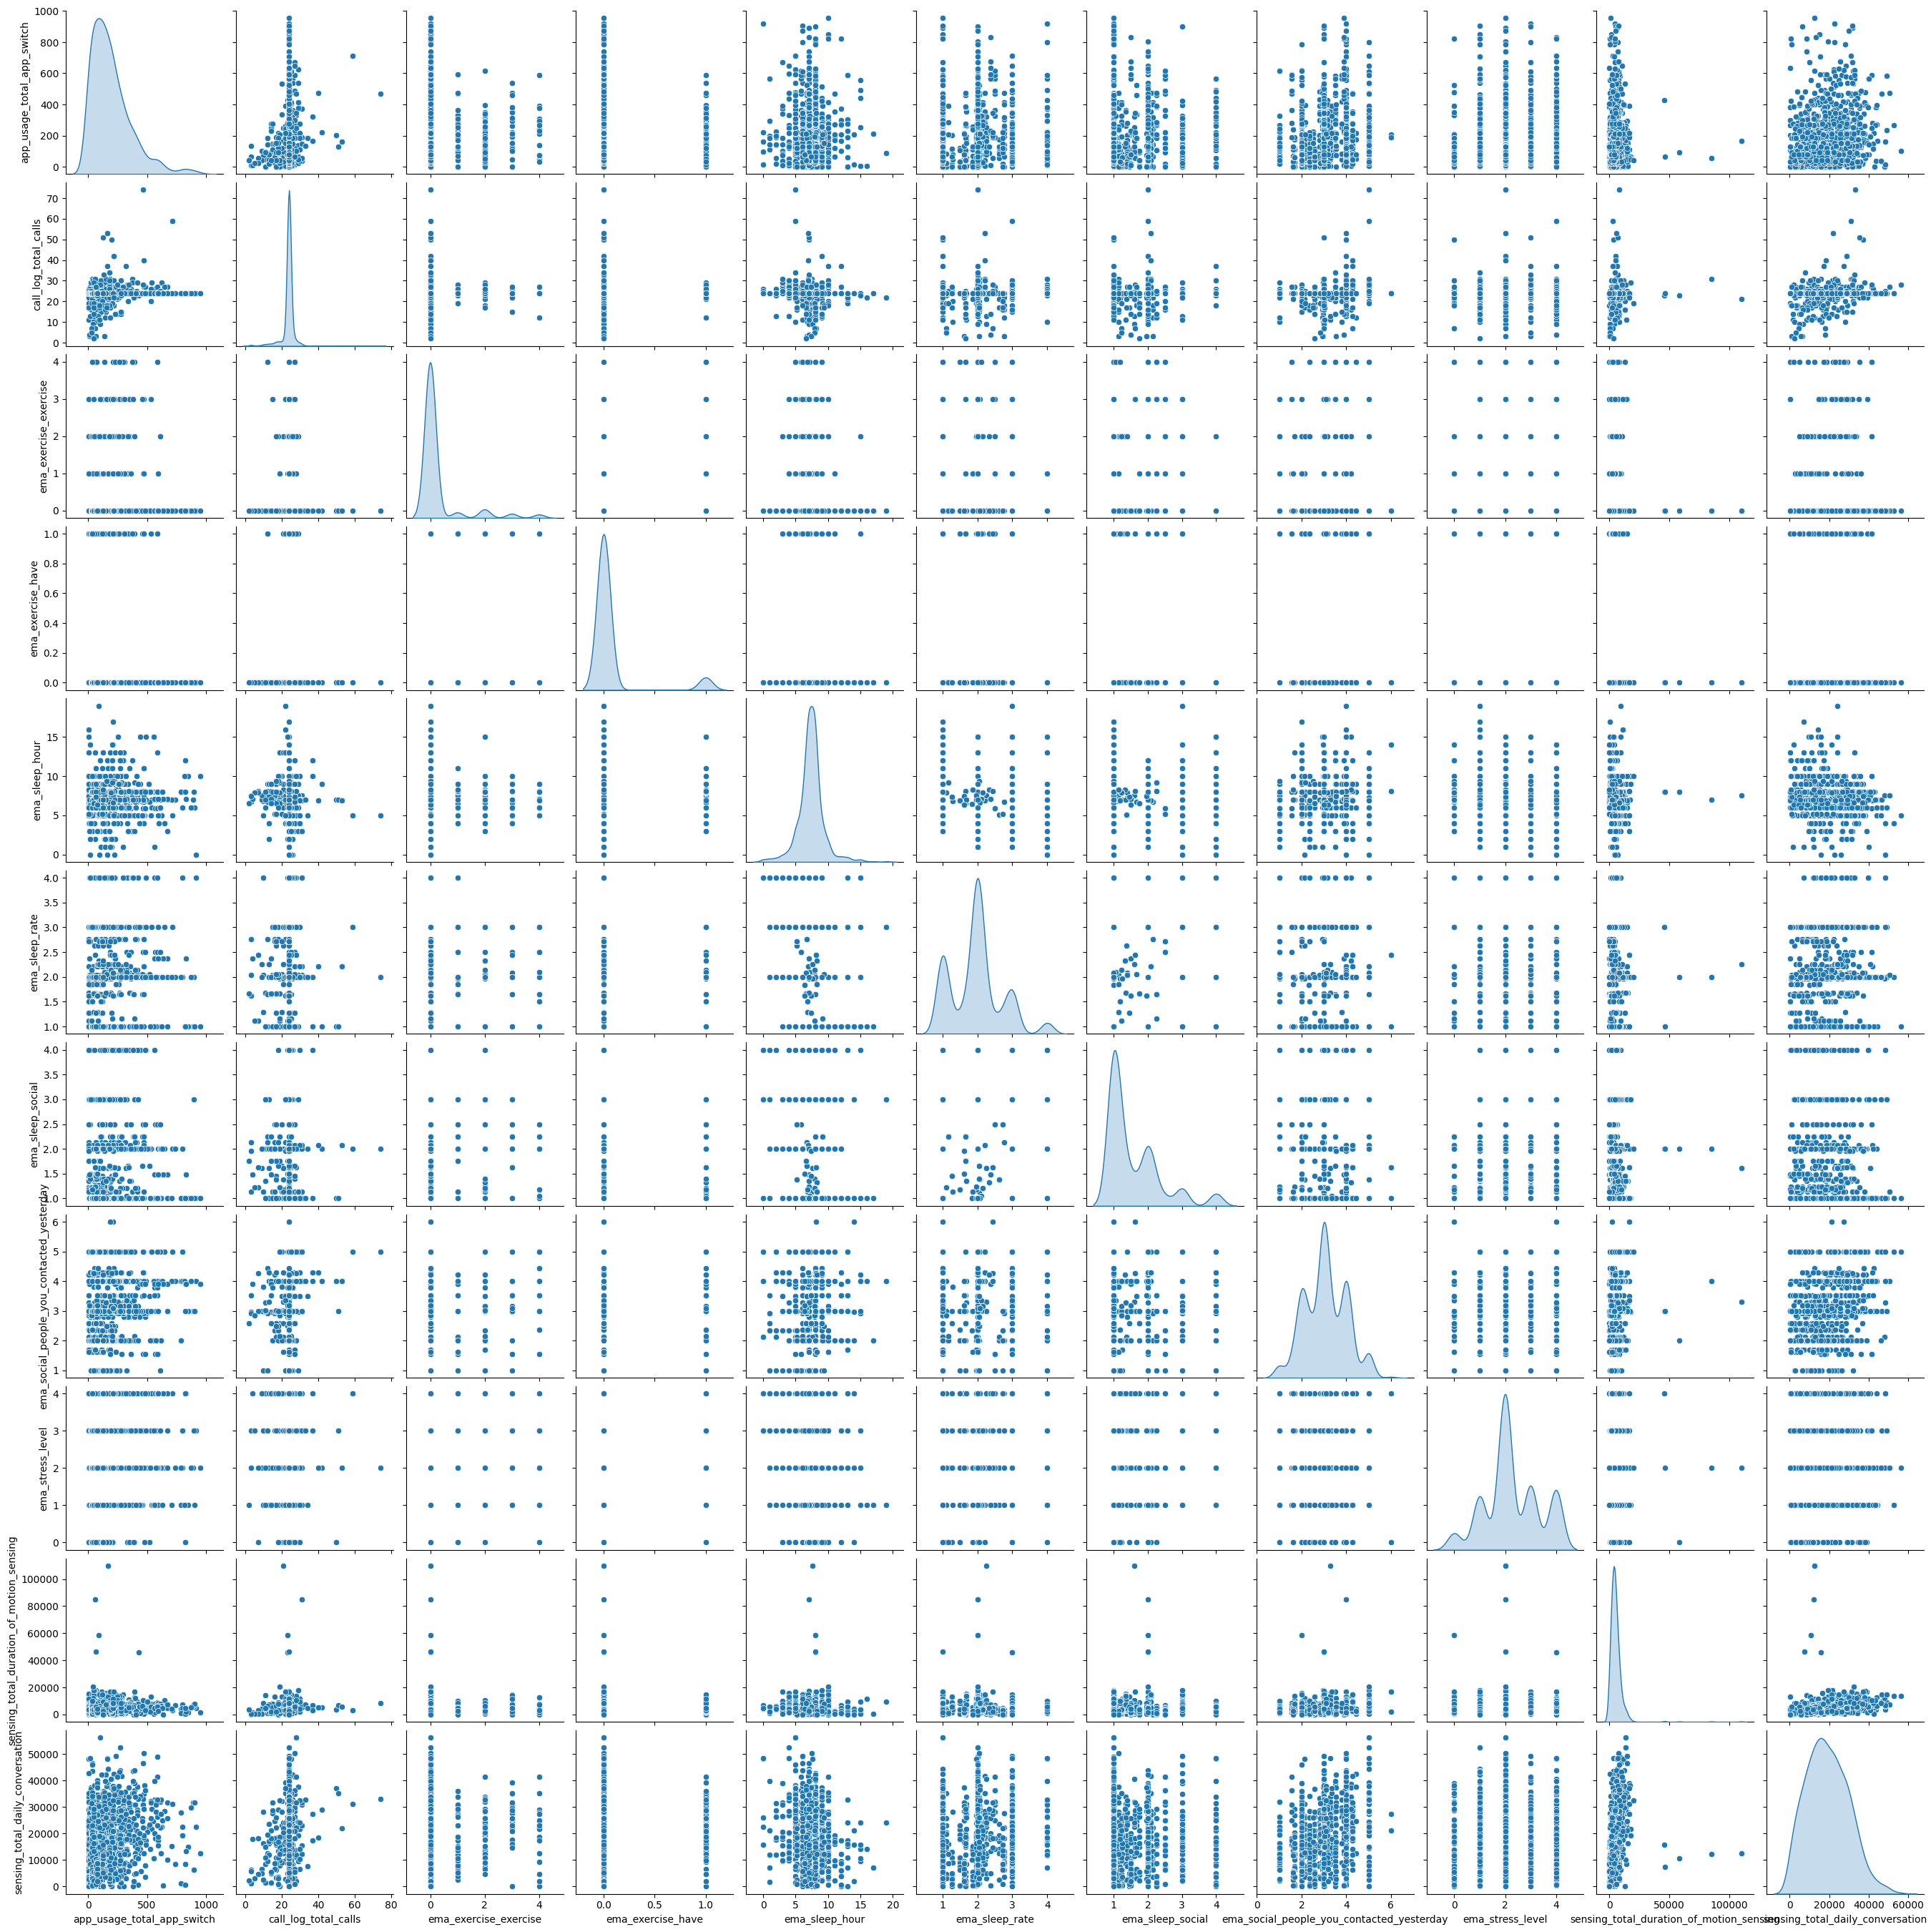

In [91]:
sns.pairplot(df[cols_to_explore],  diag_kind='kde').savefig('pairplot_df.png')

![Pair plot for df](pairplot_df.png)

In [24]:
df.columns

Index(['date', 'uid', 'app_usage_total_app_switch',
       'app_usage_total_num_tasks', 'app_usage_most_used_app',
       'call_log_total_calls', 'ema_exercise_exercise', 'ema_exercise_have',
       'ema_exercise_walk', 'ema_sleep_hour', 'ema_sleep_rate',
       'ema_sleep_social', 'ema_social_people_you_contacted_yesterday',
       'ema_stress_level', 'sensing_total_duration_of_motion_sensing',
       'sensing_total_daily_conversation', 'survey_is_talkative',
       'survey_tends_to_find_fault_with_others', 'survey_is_depressed_blue',
       'survey_is_helpful_and_unselfish_with_others',
       'survey_is_relaxed_handles_stress_well.', 'survey_worries_a_lot',
       'survey_tends_to_be_quiet', 'survey_gets_nervous_easily',
       'survey_is_easily_distracted',
       'survey_i_lead_a_purposeful_and_meaningful_life',
       'survey_i_am_a_good_person_and_live_a_good_life',
       'survey_i_am_optimistic_about_my_future', 'survey_people_respect_me',
       'survey_loneliness_score', 'su

In [25]:
px.histogram(df, x='ema_stress_level', nbins=5, title='Distribution of Stress Level')

- Stress level follows a normal distribution
- Most students arent stressed out or relaxed, they lie in between

In [26]:
stressed_students = df[df['ema_stress_level'] >= 3]
not_stressed_students = df[df['ema_stress_level'] < 3]

In [27]:
# Most used App Distribution
px.bar(df.app_usage_most_used_app.value_counts())

In [28]:
# Total Calls Distribution
px.bar(df.ema_exercise_exercise.value_counts())

In [29]:
px.histogram(df.sensing_total_duration_of_motion_sensing)

In [30]:
# Above 40000 seconds of motion sensing seems unrealistic
df = df[~(df['sensing_total_duration_of_motion_sensing']>40000)]
df.shape

(924, 39)

# Bivariate And Multivariate Analysis

In [31]:
df.loc[:,'is_stressed'] = np.where(df['ema_stress_level'] >= 3, 1, 0)

/tmp/ipykernel_326151/1751448821.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# App Switching Distribution wrt Stress Level

fig = make_subplots(rows=1, cols=2, subplot_titles=('Stressed Students', 'Not Stressed Students'),shared_yaxes=True)
fig1 = px.histogram(stressed_students, x='app_usage_total_app_switch', nbins=30, title='App Switches - Stressed Students')
fig2 = px.histogram(not_stressed_students, x='app_usage_total_app_switch', nbins=30, title='App Switches - Not Stressed Students')
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.update_layout(title_text='App Switches Distribution', showlegend=False)
fig.show()

In [33]:
px.histogram(df,'app_usage_total_app_switch', color='is_stressed',barmode='overlay')

In [34]:
df.columns

Index(['date', 'uid', 'app_usage_total_app_switch',
       'app_usage_total_num_tasks', 'app_usage_most_used_app',
       'call_log_total_calls', 'ema_exercise_exercise', 'ema_exercise_have',
       'ema_exercise_walk', 'ema_sleep_hour', 'ema_sleep_rate',
       'ema_sleep_social', 'ema_social_people_you_contacted_yesterday',
       'ema_stress_level', 'sensing_total_duration_of_motion_sensing',
       'sensing_total_daily_conversation', 'survey_is_talkative',
       'survey_tends_to_find_fault_with_others', 'survey_is_depressed_blue',
       'survey_is_helpful_and_unselfish_with_others',
       'survey_is_relaxed_handles_stress_well.', 'survey_worries_a_lot',
       'survey_tends_to_be_quiet', 'survey_gets_nervous_easily',
       'survey_is_easily_distracted',
       'survey_i_lead_a_purposeful_and_meaningful_life',
       'survey_i_am_a_good_person_and_live_a_good_life',
       'survey_i_am_optimistic_about_my_future', 'survey_people_respect_me',
       'survey_loneliness_score', 'su

In [35]:
px.histogram(df,'ema_sleep_hour', color='is_stressed',barmode='overlay')

- Stressed people sleeps lesser than the rest

In [36]:
survey_cols = df.columns[df.columns.str.contains('survey')]
no_subplot_column = len(survey_cols)//2 + len(survey_cols)%2
subplots = make_subplots(
    rows=no_subplot_column, 
    cols=2,
    subplot_titles=list(f'{col} - Stressed Students' for col in survey_cols)
    )
for i,col in enumerate(survey_cols, start=1):
    fig = px.histogram(
        df.astype(str),
        x=col,
        color='is_stressed',
        barmode='overlay',
    )
    for data in fig['data']:
        subplots.add_trace(data, row= (i//2)+1, col= (2 if i%2==0 else 1))
subplots.update_layout(height=400* no_subplot_column , width=1600, title_text="Survey Responses Distribution by Stress Level")
subplots.update_xaxes(showticklabels=True)

subplots.show()


In [37]:
# Exploring Direct Correlation
corr = df.corr(numeric_only=True)['ema_stress_level'].sort_values(ascending=False)
px.bar(corr, title='Correlation with Stress Level')

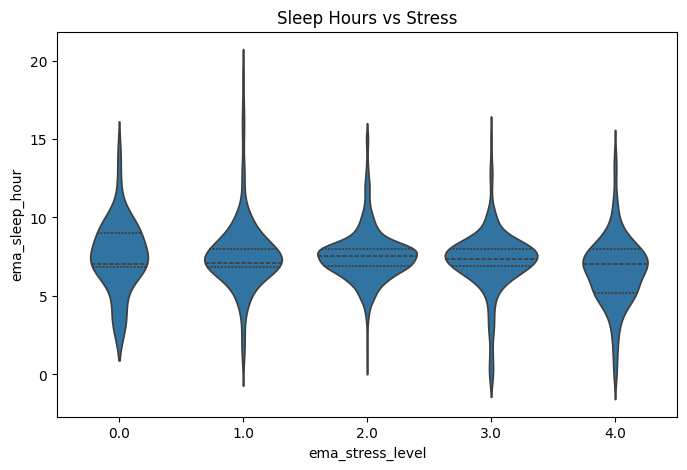

In [38]:
plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x='ema_stress_level',
    y="ema_sleep_hour",
    inner="quartile"
)
plt.title("Sleep Hours vs Stress")
plt.show()

- Students who reported with high stress levels tend to have slept less on the previous night

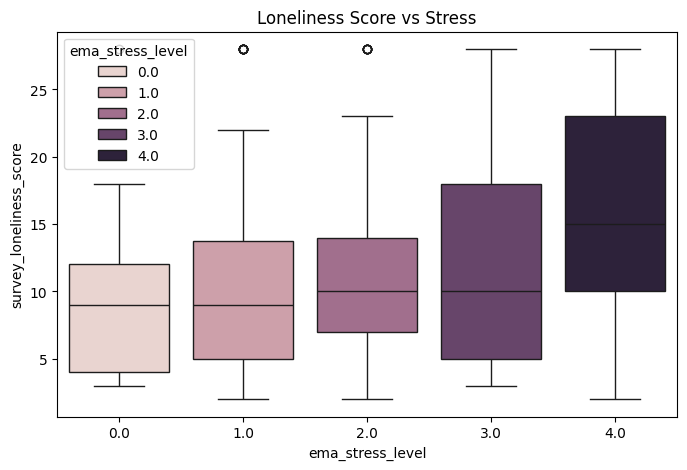

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='ema_stress_level',
    y="survey_loneliness_score",
    hue='ema_stress_level'
)
plt.title("Loneliness Score vs Stress")
plt.show()

- students who have high loneliness score are tend to be more stressed than the rest. 

Text(0.5, 1.0, 'finding fault with others relation with stress')

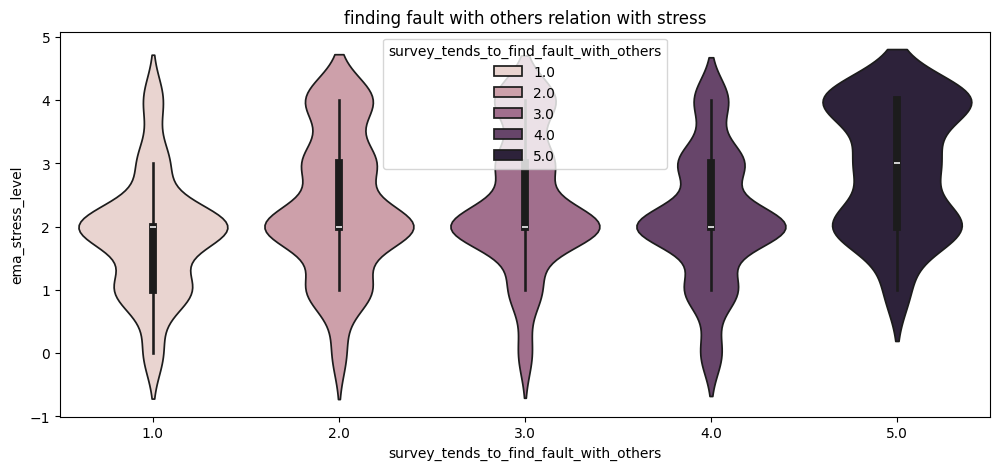

In [40]:
plt.figure(figsize=(12,5))

fig = sns.violinplot(
    df,
    y='ema_stress_level',
    x='survey_tends_to_find_fault_with_others',
    hue='survey_tends_to_find_fault_with_others',
)
fig.set_title("finding fault with others relation with stress")

- Students who agree to find fault in others are more stressed than those who don't.

<Axes: xlabel='sensing_total_daily_conversation', ylabel='sensing_total_duration_of_motion_sensing'>

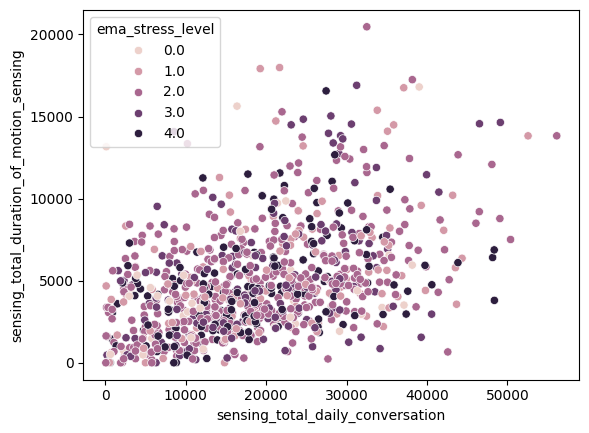

In [41]:
sns.scatterplot(
    df,
    y="sensing_total_duration_of_motion_sensing",
    x="sensing_total_daily_conversation",
    hue ='ema_stress_level',
)

- No noticeable relation --- IGNORE ---

Text(0.5, 1.0, 'Bed Time relation with Stress level')

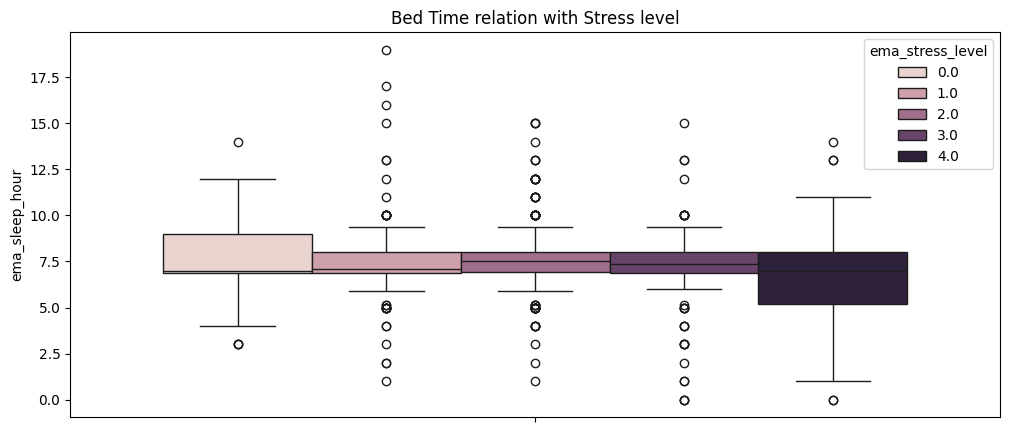

In [42]:
plt.figure(figsize=(12,5))
fig = sns.boxplot(
    df,
    y="ema_sleep_hour",
    # y="ema_sleep_rate",
    hue='ema_stress_level'
)
fig.set_title("Bed Time relation with Stress level")

- Students who sleeps less than 7` hr a day are more prone to have high stress   

Text(0.5, 1.0, 'Sleep Quality vs Stress')

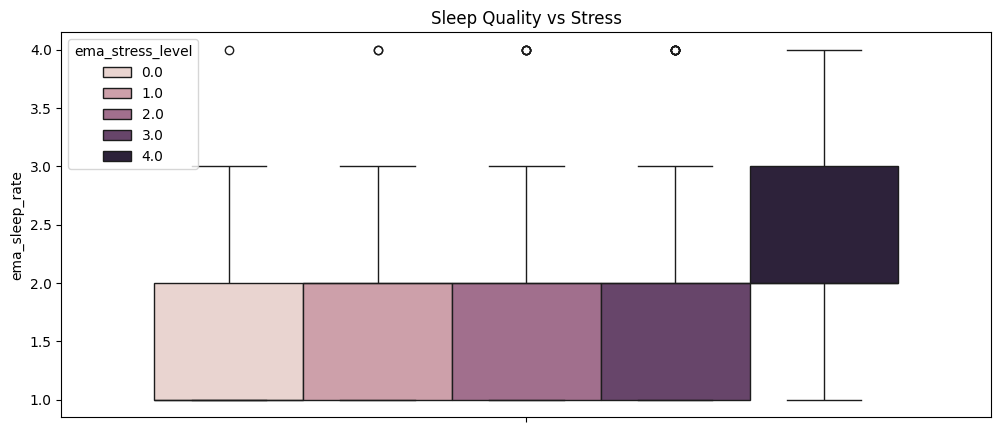

In [43]:
plt.figure(figsize=(12,5))
fig = sns.boxplot(
    df,
    y="ema_sleep_rate",
    hue='ema_stress_level'
)
fig.set_title("Sleep Quality vs Stress")

- Most of the highly stress students have reported bad or very bad sleep quality.

In [44]:
target = 'ema_stress_level'
app_dist = (
    df.groupby([target, "app_usage_most_used_app"])
      .size()
      .reset_index(name="count")
)

px.bar(
    app_dist,
    x="app_usage_most_used_app",
    y="count",
    color=target,
    barmode="stack",
    title="Most Used App by Stress"
).show()


- No noticeable relation --- IGNORE ---

# Model Building

- Note: Main aim of this project was to showcase data processing skills

In [63]:
columns_to_drop = ['uid','date','is_stressed','app_usage_most_used_app','ema_stress_level',
                    'app_usage_total_num_tasks',
                    'sensing_total_duration_of_motion_sensing',
                    'survey_worries_a_lot',
                    'survey_gets_nervous_easily',
                    'survey_loneliness_score', 
                    'survey_survey_stress_score',
                    'call_log_total_calls', 
                    'ema_sleep_rate',
                    'survey_people_respect_me',
                    'survey_taken_sleeping_medicine'
                    ]
X = df.drop(columns = columns_to_drop)
features_for_prediction = X.columns.tolist()
X = StandardScaler().fit_transform(X)

# y = df.is_stressed
y = df.ema_stress_level

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
print(X.shape)

model = XGBClassifier(
    n_estimators=300,
    eval_metric='mlogloss',
    random_state=42
)

model.fit(X_train,y_train)
model.score(X_test,y_test)

(924, 25)


0.42162162162162165

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from joblib import parallel_backend


param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(2.0, 0.01),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(
        objective='multi:softprob',
        num_class=5,
        eval_metric='mlogloss',
        random_state=42
    ),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1
)

with parallel_backend('threading'):
    search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.9821509165175494, learning_rate=2.008401345852547, max_depth=7, n_estimators=477, subsample=0.9664001175286112; total time=   2.1s
[CV] END colsample_bytree=0.9821509165175494, learning_rate=2.008401345852547, max_depth=7, n_estimators=477, subsample=0.9664001175286112; total time=   1.0s
[CV] END colsample_bytree=0.9821509165175494, learning_rate=2.008401345852547, max_depth=7, n_estimators=477, subsample=0.9664001175286112; total time=   2.1s
[CV] END colsample_bytree=0.9821509165175494, learning_rate=2.008401345852547, max_depth=7, n_estimators=477, subsample=0.9664001175286112; total time=   1.3s
[CV] END colsample_bytree=0.9821509165175494, learning_rate=2.008401345852547, max_depth=7, n_estimators=477, subsample=0.9664001175286112; total time=   0.7s
[CV] END colsample_bytree=0.9763957537920251, learning_rate=2.007771345897118, max_depth=6, n_estimators=454, subsample=0.987296252006332; tota

In [65]:
best_xgb = search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print('xgb-best-score - ',best_xgb.score(X_test, y_test))

xgb-best-score -  0.43783783783783786


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29        10
         1.0       0.30      0.24      0.27        33
         2.0       0.54      0.60      0.57        80
         3.0       0.29      0.30      0.30        30
         4.0       0.41      0.44      0.42        32

    accuracy                           0.44       185
   macro avg       0.41      0.36      0.37       185
weighted avg       0.43      0.44      0.43       185



In [67]:
# Exploring Feature Importance
importance = pd.Series(
    best_xgb.feature_importances_,
    index=df[features_for_prediction].columns
).sort_values(ascending=False)

importance

fig = px.bar(importance, title='Feature Importance from XGBoost')
fig.update_layout(height=800, width=1500)

## Training Neural Network

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor  = torch.tensor(X_test, dtype=torch.long)
y_test_tensor  = torch.tensor(y_test.values, dtype=torch.long)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds  = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=16, shuffle=False)


class NeuralNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes),
            # nn.Sigmoid()
        )


    def forward(self, x):
        return self.net(x)


In [69]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NeuralNet(
    input_dim=X_train.shape[1],
    num_classes=5
).to(device)

class_counts = torch.bincount(y_train_tensor)
# class_weights = 1.0 / class_counts.float()
class_weights = 1.0 / torch.sqrt(class_counts.float())

criterion = nn.CrossEntropyLoss(
    weight=class_weights.to(device)
)

# criterion = nn.CrossEntropyLoss()   # 🔥 multiclass loss
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 150

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.float().to(device)
        y_batch = y_batch.long().to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        loss.backward()
        optimizer.step()


    print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f}")

Epoch 1/150 | Loss: 0.0000
Epoch 2/150 | Loss: 0.0000
Epoch 3/150 | Loss: 0.0000
Epoch 4/150 | Loss: 0.0000
Epoch 5/150 | Loss: 0.0000
Epoch 6/150 | Loss: 0.0000
Epoch 7/150 | Loss: 0.0000
Epoch 8/150 | Loss: 0.0000
Epoch 9/150 | Loss: 0.0000
Epoch 10/150 | Loss: 0.0000
Epoch 11/150 | Loss: 0.0000
Epoch 12/150 | Loss: 0.0000
Epoch 13/150 | Loss: 0.0000
Epoch 14/150 | Loss: 0.0000
Epoch 15/150 | Loss: 0.0000
Epoch 16/150 | Loss: 0.0000
Epoch 17/150 | Loss: 0.0000
Epoch 18/150 | Loss: 0.0000
Epoch 19/150 | Loss: 0.0000
Epoch 20/150 | Loss: 0.0000
Epoch 21/150 | Loss: 0.0000
Epoch 22/150 | Loss: 0.0000
Epoch 23/150 | Loss: 0.0000
Epoch 24/150 | Loss: 0.0000
Epoch 25/150 | Loss: 0.0000
Epoch 26/150 | Loss: 0.0000
Epoch 27/150 | Loss: 0.0000
Epoch 28/150 | Loss: 0.0000
Epoch 29/150 | Loss: 0.0000
Epoch 30/150 | Loss: 0.0000
Epoch 31/150 | Loss: 0.0000
Epoch 32/150 | Loss: 0.0000
Epoch 33/150 | Loss: 0.0000
Epoch 34/150 | Loss: 0.0000
Epoch 35/150 | Loss: 0.0000
Epoch 36/150 | Loss: 0.0000
E

In [70]:
from sklearn.metrics import classification_report

model.eval()
y_pred, y_true = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.float().to(device)   # 🔥 FIX
        y_batch = y_batch.long().to(device)    # 🔥 FIX

        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)

        y_pred.extend(preds.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.40      0.30        10
           1       0.52      0.36      0.43        33
           2       0.60      0.66      0.63        80
           3       0.24      0.23      0.24        30
           4       0.41      0.34      0.37        32

    accuracy                           0.47       185
   macro avg       0.40      0.40      0.39       185
weighted avg       0.47      0.47      0.47       185



In [ ]:
# XGBoost Classification Report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29        10
         1.0       0.30      0.24      0.27        33
         2.0       0.54      0.60      0.57        80
         3.0       0.29      0.30      0.30        30
         4.0       0.41      0.44      0.42        32

    accuracy                           0.44       185
   macro avg       0.41      0.36      0.37       185
weighted avg       0.43      0.44      0.43       185

